In [0]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
#We use 1 dimensional arrays due to audio files, we use Conv1D and MaxPooling1D
#Dense is used for connecting the entire neural network
#Flattening is the process of converting all the resultant 1D arrays into a single long continuous linear vector
#A dropout layer is used for regularization where you randomly set some of the dimensions of your input vector to be zero
from keras.models import Model #Used to instantiate a Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from matplotlib import pyplot 
import random

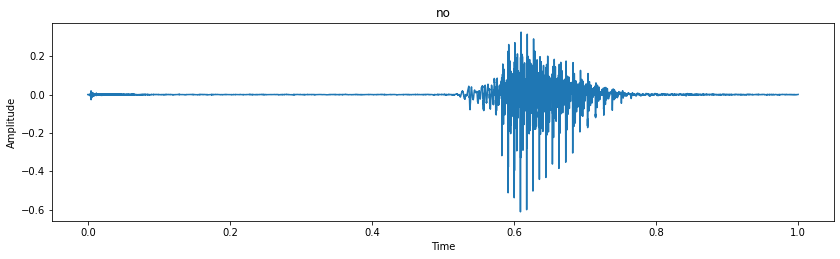

In [37]:
train_audio_path = '/content/drive/My Drive/Speechcommand/'
samples, sample_rate = librosa.load(train_audio_path+'no/0f3f64d5_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8)) #FigSize determines the pixels of the plot
ax1 = fig.add_subplot(211) #Subplot grid parameter of 2x1 at the top left of the plot
ax1.set_title('no')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [38]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [39]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

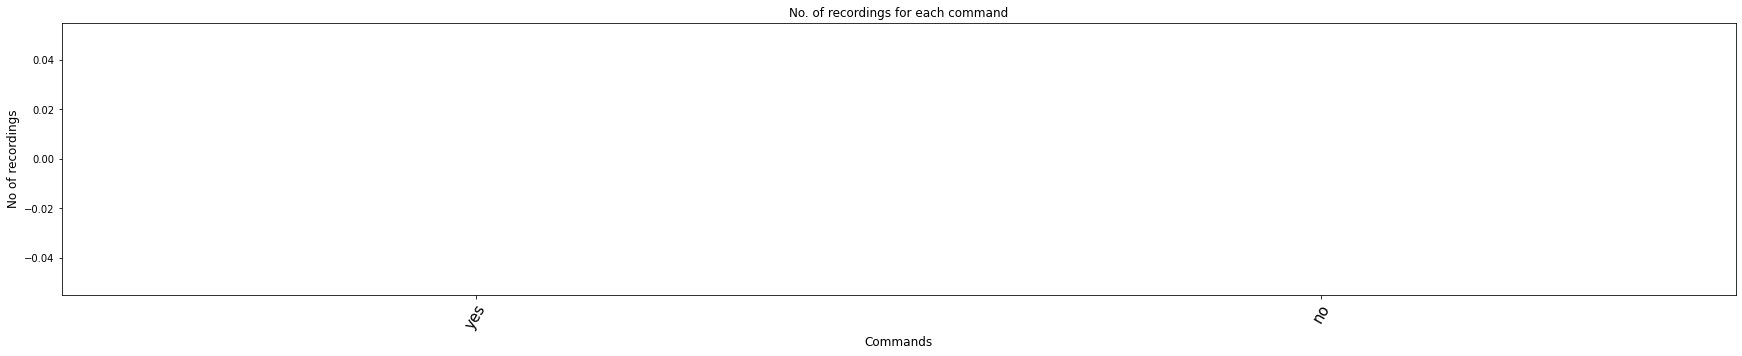

In [40]:
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/') if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["yes","no"]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

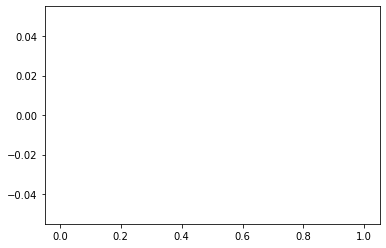

In [41]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/') if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [42]:
train_audio_path = '/content/drive/My Drive/Speechcommand/'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path+ label + '/') if f.endswith('.wav')]
    print(os.listdir(train_audio_path+label))
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path  + '/' +label+ '/' + wav, sr = 16000)
        
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            print(samples)
            all_wave.append(samples)
            all_label.append(label)

yes
['0a7c2a8d_nohash_0.wav', '0ab3b47d_nohash_0.wav', '0a9f9af7_nohash_1.wav', '0a9f9af7_nohash_0.wav', '0a9f9af7_nohash_2.wav', '0c2ca723_nohash_0.wav', '0b56bcfe_nohash_0.wav', '0ac15fe9_nohash_0.wav', '0b40aa8e_nohash_0.wav', '0bd689d7_nohash_0.wav', '0c2d2ffa_nohash_0.wav', '0d2bcf9d_nohash_0.wav', '0c5027de_nohash_0.wav', '0c5027de_nohash_1.wav', '0f3f64d5_nohash_1.wav', '0ea0e2f4_nohash_0.wav', '0f3f64d5_nohash_0.wav', '0f7dc557_nohash_0.wav', '00f0204f_nohash_0.wav', '0f7dc557_nohash_1.wav', '00f0204f_nohash_1.wav', '1a5b9ca4_nohash_0.wav', '0fa1e7a9_nohash_0.wav', '00f0204f_nohash_2.wav', '0f7205ef_nohash_0.wav', '0ff728b5_nohash_0.wav', '0ff728b5_nohash_1.wav', '1a5b9ca4_nohash_1.wav', '0ff728b5_nohash_4.wav', '0ff728b5_nohash_3.wav', '0ff728b5_nohash_2.wav', '1a9afd33_nohash_0.wav', '1a4259c3_nohash_0.wav', '1aeef15e_nohash_1.wav', '1a073312_nohash_0.wav', '1a673010_nohash_0.wav', '1a673010_nohash_1.wav', '1a673010_nohash_2.wav', '1aed7c6d_nohash_0.wav', '1aeef15e_nohash_0.w

In [0]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [0]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [0]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),test_size = 0.2,random_state=777,shuffle=True)

In [46]:

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)


#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)


outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 2662, 8)           0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 2662, 8)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 884, 16)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 884, 16)           0   

In [47]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Train on 317 samples, validate on 80 samples
Epoch 1/10
317/317 [==============================] - 3s 10ms/step - loss: 0.6959 - acc: 0.4858 - val_loss: 0.6900 - val_acc: 0.5625

Epoch 00001: val_acc improved from -inf to 0.56250, saving model to best_model.hdf5
Epoch 2/10
317/317 [==============================] - 2s 7ms/step - loss: 0.6894 - acc: 0.5710 - val_loss: 0.6925 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.56250
Epoch 3/10
317/317 [==============================] - 2s 7ms/step - loss: 0.6762 - acc: 0.6057 - val_loss: 0.6794 - val_acc: 0.5750

Epoch 00003: val_acc improved from 0.56250 to 0.57500, saving model to best_model.hdf5
Epoch 4/10
317/317 [==============================] - 2s 7ms/step - loss: 0.6624 - acc: 0.5899 - val_loss: 0.6728 - val_acc: 0.5625

Epoch 00004: val_acc did not improve from 0.57500
Epoch 5/10
317/317 [==============================] - 2s 7ms/step - loss: 0.6455 - acc: 0.6215 - val_loss: 0.6562 - val_acc: 0.6500

Epoch 00005: val_a

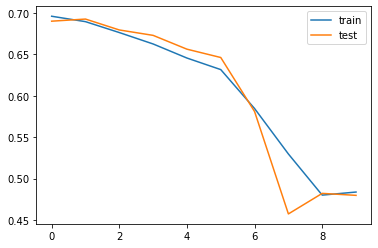

In [48]:
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [0]:
def predict(audio):
    prob=model.predict(audio.reshape(-1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [50]:
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
#print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Text: no


In [51]:
predict(samples)

'no'